# Gmail Smart Compose

# 1. Business Problem

## 1.1. Description
Source of data - https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

AS we all know about the E-mail, the E-mail continues to be a ubiquitous and growing form of communication all over the world, with an estimated 3.8 billion users sending 281 billion e-mails daily.

All you have experienced the Gmail smart compose, maybe even without knowing you all are actually using the Gmail smart compose
in daily life. Maybe you notice when typing an email, sometimes Gmail suggests the relevant or relevant sentences, this is nothing but Gmail smart compose.

#### Problem statement : 
So here is the task we have to make a model, which can predict the sentences or words based on the given sentence or some words. the input is a sequence of words and the output is also a sequence of words, so we have to build the sequency-based model. 

## 1.2. Source/Useful Links
Some articles and reference blogs about the problem statement

Blog 1 https://arxiv.org/pdf/1906.00080.pdf - This is the main research paper on the implementation of Smart Gmail Compose.

Blog 2  https://towardsdatascience.com/gmail-style-smart-compose-using-char-ngram-language-models-a73c09550447

Blog 3 https://blog.jiayihu.net/gmail-smart-compose-in-keras-and-tensorflow-js/ 

## 1.3. Data Information
For this task, our data is Gmail conversation-based data.

The dataset we use is The Enron Email Dataset, and the dataset contains 500,000+ emails from 150 employees of the Enron Corporation.It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

Link of dataset https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

# 2 Problem Formulation

Sequence and language modeling task

So here our input and output are the sequences of words and we have to predict the sequence of words given the input of sentences.

Here the use of a Neural network-based model is preferable to the simple
machine learning model, the task is a sequence-based task, so we can use
sequence-to sequence-based models like LSTM, and GRU, and also we can use
Encode decoder based model. 

To create the data we can use the  character n-gram like this,  let
suppose we have the one sentence ‘here is our mail’ so our x_train and y_train
look like this, 

    x_train           y_train
    h                 ere is our mail
    he                re is our mail
    her               e is our mail
    here              is our mail
    here i            s our mail
    here is           our mail 


# 3 Performance Metrics
As the performance metrics, we use the BLEU (Bilingual Evaluation Understudy) score, it is a score for comparing a candidate translation of text to one or more reference translations more about https://machinelearningmastery.com/calculate-bleu-score-for-text-python/

<p>It is quick and inexpensive to calculate.<br> 
It is easy to understand.<br>
It is language independent.<br>
It correlates highly with human evaluation.<br>
It has been widely adopted.</p>

Main research paper use the perplexity as the performance matrix, perplexity metric in NLP is a way to capture the degree of ‘uncertainty’ a model has in predicting (assigning probabilities to) some text. 


## Import Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import email
import seaborn as sns
import scipy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [57]:
#read the data
data = pd.read_csv('/content/drive/MyDrive/case study 2/emails.csv')

In [58]:
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [59]:
data.shape

(517401, 2)

In [ ]:
print(data.message.values[180])

Message-ID: <22766758.1075855690869.JavaMail.evans@thyme>
Date: Fri, 26 May 2000 00:08:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: Re: Todays update
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,
 I am going to be in Seguin this Saturday through Monday.  We can talk about 
a unit for Wade then.  I will call the bank again today to resolve 
authorization on the account.  Lets keep the office open until noon on 
Memorial day.

Philllip


#### Obs
Our mail contains many things like, message id, date, time, subject, etc.

When we clean the data we have to care about the
privacy,
because mail can contain the user's phone number, account number, etc.

here we only need only message and, the rest of all things we remove from the data

And here we have the total number of data points are 517401

# 4 Exploratory Data Analysis(EDA)

In [ ]:
message = data.message.values[180]
e = email.message_from_string(message)
e.items()

[('Message-ID', '<22766758.1075855690869.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 26 May 2000 00:08:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'stagecoachmama@hotmail.com'),
 ('Subject', 'Re: Todays update'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', '"Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen.nsf')]

In [ ]:
e.get_payload()

'Lucy,\n I am going to be in Seguin this Saturday through Monday.  We can talk about \na unit for Wade then.  I will call the bank again today to resolve \nauthorization on the account.  Lets keep the office open until noon on \nMemorial day.\n\nPhilllip'

As a first step here we remove the subject, and user mail id and we take only the messages from the data.
to do this step we use the email library.

Basically, the email library converts the whole mail into a list of tuples and takes only those tuples that contain the message.

In [60]:
#extract the message from the mail
mail = []
for i in tqdm(data.message.values):
  e = email.message_from_string(i)
  mail.append(e.get_payload())

100%|██████████| 517401/517401 [01:25<00:00, 6042.22it/s]


In [61]:
#count the length of the message
data['mail'] = mail
data['len']  = list(data['mail'].apply(lambda x:len(x)))

In [ ]:
data.describe()

,len
count,5.174010e+05
mean,1.845373e+03
std,8.181162e+03
min,1.000000e+00
25%,2.880000e+02
50%,7.700000e+02
75%,1.757000e+03
max,2.011422e+06


Here the mean value is 1845 which means most data point has an 1845 length of the message

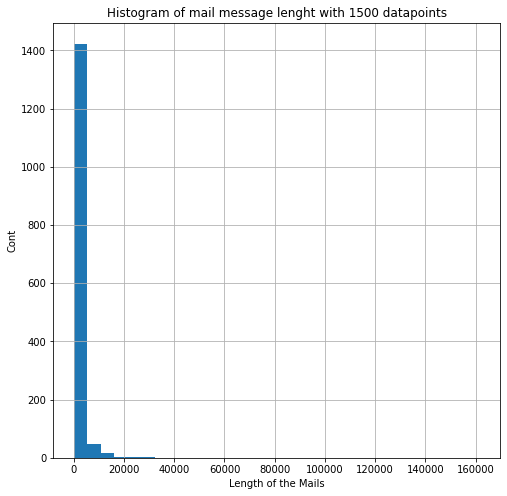

In [ ]:
x_1 = data.len.sample(1500)
plt.figure(figsize=(8,8))
plt.hist(x_1,bins = 30)
plt.title("Histogram of mail message lenght with 1500 datapoints")
plt.xlabel("Length of the Mails")
plt.ylabel("Cont")
plt.grid()

Let's do some first basic EDA on the length of the message

Here we take the random 1500 mail and we plot the histogram of the length of mail.

From the histogram, we can say there are many mail messages where the length of the message is between 1000 to 10000 and a very small part of the message where the length message is above the 30000.

I think is very long message is not adding much more value to our study so we remove all these types of the message from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


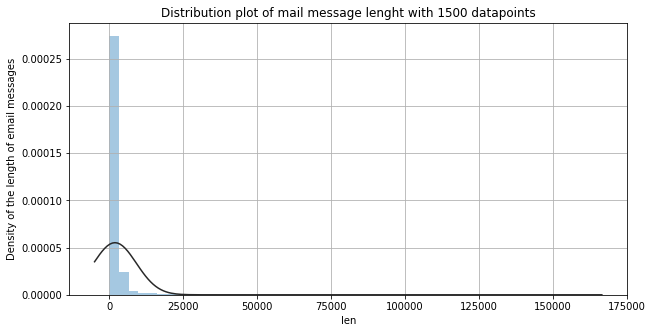

In [ ]:
from scipy import stats
sample = x_1
plt.figure(figsize=(10,5))
plt.title("Distribution plot of mail message lenght with 1500 datapoints")
plt.ylabel('Density of the length of email messages')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

Here we take the same sample as above, and we plot the distribution of the mail message length, the distribution falls down very sharply and the tail of the distribution is very long.

so we can say here the more message length is between the 0 to 10k and very less point has a length of more than the 10k.

In [ ]:
import numpy as np
a = data.len.values
for i in range(5 , 105,5):
    p = np.percentile(a, i)
    print('{} Percentile value is {}'.format(i,p))

5 Percentile value is 58.0
10 Percentile value is 109.0
15 Percentile value is 167.0
20 Percentile value is 221.0
25 Percentile value is 288.0
30 Percentile value is 361.0
35 Percentile value is 447.0
40 Percentile value is 539.0
45 Percentile value is 647.0
50 Percentile value is 770.0
55 Percentile value is 905.0
60 Percentile value is 1067.0
65 Percentile value is 1251.0
70 Percentile value is 1465.0
75 Percentile value is 1757.0
80 Percentile value is 2146.0
85 Percentile value is 2706.0
90 Percentile value is 3657.0
95 Percentile value is 5909.0
100 Percentile value is 2011422.0


In [ ]:
for i in range(90 , 101,1):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

90  percentile value is 3657.0
91  percentile value is 3946.0
92  percentile value is 4303.0
93  percentile value is 4746.0
94  percentile value is 5282.0
95  percentile value is 5909.0
96  percentile value is 6792.0
97  percentile value is 8185.0
98  percentile value is 10674.0
99  percentile value is 16229.0
100  percentile value is 2011422.0


In [ ]:
for i in np.arange(0.1, 1.1, 0.1):
    b = (99+i)/100* 100
    p = np.percentile(a, b)
    print(b,' percentile value is',p)

99.1  percentile value is 17646.000000000233
99.2  percentile value is 19156.0
99.3  percentile value is 20754.0
99.4  percentile value is 23214.0
99.5  percentile value is 27195.0
99.6  percentile value is 31196.800000000396
99.7  percentile value is 36641.0
99.8  percentile value is 51085.0
99.9  percentile value is 83929.20000001404
100.0  percentile value is 2011422.0


Here we  find the percentile values of the mail message length,

In the first section, we find the 5 to 100 percentile values and the 5 percentile value is 58 which means the 5 percent data has a length is 58, but the 95 to 100 percentile values increase the very fast, so let's zoom the values of 95 to 100 percentile values.

In the second, we take the 90 to 100 percentile values and we show that the 99 percent data length is 16k but in 99 to 100 percent value increases very fast, so we zoom further,

In the third section we take the 99 to 100 percentile values and the message length increase very fast so here we take only 5 to 95 percentile values and the rest of the data we remove from the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


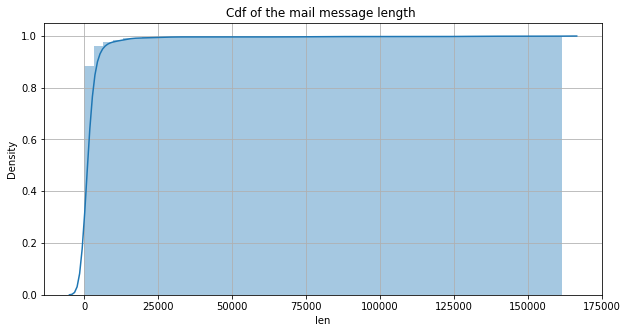

In [ ]:
sample = x_1
plt.figure(figsize=(10,5))
plt.title("Cdf of the mail message length ")
ax = sns.distplot(sample, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.grid()

From the CDF we can say that 99% of the data mail message length is less than the 10k

In [115]:
#removing further data points based on the 0th and 99th percentile values
data_ = data[(data.len > 0) & (data.len< 16229)]

In [116]:
data_.shape

(512226, 4)

After the removing unwanted data we have the total number of data points are 465083

In [117]:
data_.describe()

,len
count,512226.000000
mean,1435.399931
std,2000.803828
min,1.000000
25%,285.000000
50%,757.000000
75%,1710.000000
max,16223.000000


After the removing the unwanted data points the mean value is 1179

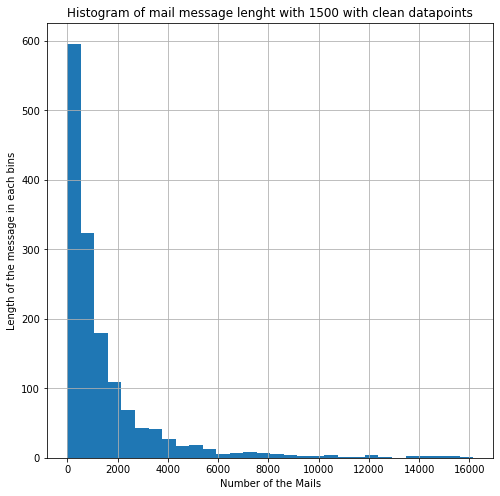

In [118]:
x_2 = data_.len.sample(1500)
plt.figure(figsize=(8,8))
plt.hist(x_2,bins = 30)
plt.title("Histogram of mail message lenght with 1500 with clean datapoints")
plt.xlabel("Number of the Mails")
plt.ylabel("Length of the message in each bins")
plt.grid()

After the removal of the unwanted mail message length, our histogram looks very clear and most of the mail message length is less than the 3000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


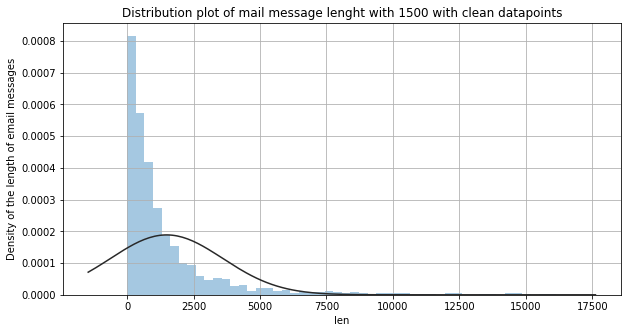

In [120]:
from scipy import stats
sample = x_2
plt.figure(figsize=(10,5))
plt.title("Distribution plot of mail message lenght with 1500 with clean datapoints")
plt.ylabel('Density of the length of email messages')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


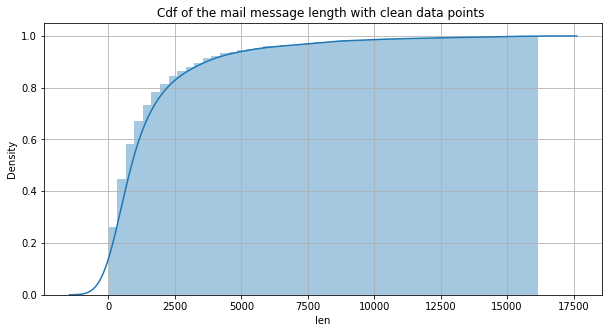

In [121]:
sample = x_2
plt.figure(figsize=(10,5))
plt.title("Cdf of the mail message length with clean data points ")
ax = sns.distplot(sample, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.grid()

From the CDF we can say that 99% of the data mail message length is less than the 5000

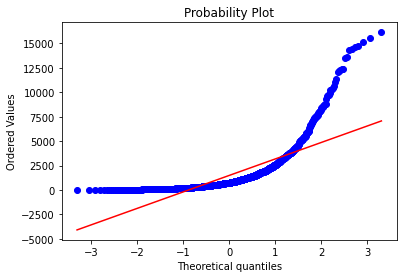

In [122]:
#Q-Q plot for checking if the mail message length is normal distribution
scipy.stats.probplot(sample, plot=plt)
plt.show()

From the Q-Q plot, we can say the length of the message is not follow the normal distribution

# 5.**Data Cleaning**

In [123]:
import pickle
with open('/content/drive/MyDrive/case study 2/mail.pkl', 'rb') as handle:
    df = pickle.load(handle)

In [62]:
df.sample(5)

,file,message,mail,len
84927,davis-d/discussion_threads/309.,Message-ID: <5552864.1075853942250.JavaMail.ev...,-----Original Message-----\nFrom: Sandy Lee\nS...,17353
340605,motley-m/deleted_items/79.,Message-ID: <4614444.1075841334844.JavaMail.ev...,"Hello Matt Motley, \n\nIn this issue: \n\n- Fe...",1213
315936,mann-k/fuel_cells/66.,Message-ID: <5813484.1075845881506.JavaMail.ev...,"As promised by Jerry Leitman, I am attaching a...",1297
455480,steffes-j/sent_items/1465.,Message-ID: <28997229.1075855204269.JavaMail.e...,Agree with bob - we are done\n----------------...,73
338428,meyers-a/deleted_items/996.,Message-ID: <2819825.1075841314031.JavaMail.ev...,\n\nStart Date: 1/2/02; HourAhead hour: 20; N...,215


In [124]:
#here we apply all the cleaning things
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def data_cleaning(text):
    if text is not None:
        #stopwords_list = stopwords.words('english')
        q = re.sub('Message-ID[^\n]+', ' ', text)
        q = re.sub('Date[^\n]+', ' ', q)
        q = re.sub('X[^\n]+', ' ', q)
        q = re.sub('Content[^\n]+', ' ', q)
        q = re.sub('From[^\n]+', ' ', q)
        q = re.sub('To[^\n]+', ' ', q)
        q = re.sub('Subject[^\n]+', ' ', q)
        q = re.sub('Mime-Version[^\n]+', ' ', q)
        q = re.sub('.*?\(.*?\)',' ',q)
        q = re.sub('--[^\n]+', ' ', q)
        q = re.sub('cc:[^\n]+|Cc:[^\n]+', ' ', q)
        q = re.sub('Sent:[^\n]+', '', q)
        q = re.sub('email address:[^\n]+', ' ', q)
        q = re.sub('[0-9]+', ' ', q)
        q = re.sub('[\/:]', ' ', q)
        q = re.sub('AM|PM|a\.m\.|p\.m\.', ' ', q)
        q = re.sub('\(|\)|,|;|\.|!', ' ', q)
        q = re.sub('-[^\n]+', '', q)
        q = re.sub('-', ' ', q)
        q = re.sub('\?', ' ', q)
        q = re.sub('\@', ' ', q)
        q = re.sub('[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+', ' ', q)
        q = re.sub('(Write to:|From:).*',' ',q)
        q = re.sub('re:', ' ', q)
        q = re.sub('\[[^]]*\]', ' ', q)
        q = re.sub(r'[^\w\s]',' ',q)
        #remove the < anykeyword> like this from the data
        q = re.sub('<.*>',' ',q)
        #remove the all word which is present in the bracket
        q = re.sub('\(.*\)',' ',q)
        #remove all the new lines
        q = re.sub(r'[\n\t-]*','',q)

        #remove all the word which is end with :
        q = re.sub(r'\w+:\s?','',q)

        #replace the short word with there full words code taken from donors choose assignment
            # specific
        q = re.sub(r"won't", " will not", q)
        q = re.sub(r"can\'t", " can not", q)

        # general
        q = re.sub(r"n\'t", " not", q)
        q = re.sub(r"\'re", " are", q)
        q = re.sub(r"\'s", " is", q)
        q = re.sub(r"\'d", " would", q)
        q = re.sub(r"\'ll", " will", q)
        q = re.sub(r"\'t", " not", q)
        q = re.sub(r"\'ve", " have", q)
        q = re.sub(r"\'m", " am", q)

        q = re.sub(r'\b_([a-zA-z]+)_\b',r'\1' , q)
        q = re.sub(r'\b_([a-zA-z]+)\b',r'\1' , q)
        q = re.sub(r'\b([a-zA-z]+)_\b',r'\1' , q)

        #remove _ sign from the word like di_shivam and we want only shivam
        q = re.sub(r'\b[a-zA-Z]{1}_([a-zA-Z]+)',r'\1'  , q)
        q = re.sub(r'\b[a-zA-Z]{2}_([a-zA-Z]+)',r'\1' , q)

        #convert all into a lower case
        q = q.lower()

        #remove the words which are greater than or equal to 15 or less than or equal to 2
        #https://stackoverflow.com/questions/24332025/remove-words-of-length-less-than-4-from-string
        q = re.sub(r'\b\w{,2}\b' ,'', q)
        q = re.sub(r'\b\w{15,}\b','', q)

        #replace all the words except "A-Za-z_" with space
        q= re.sub(r'[^a-zA-Z_]',' ',q)
        q = q.replace("\n", " ")
#       f = ' '.join([word for word in q.split() if word not in stopwords.words("english")])\
        f = ' '.join([word for word in q.split()])
        return f

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
import re
output = []
for i in tqdm(data_.mail.values):
    a = data_cleaning(i)
    output.append(a)

100%|██████████| 512226/512226 [15:15<00:00, 559.25it/s]


In [128]:
df = pd.DataFrame()
df['preprocess_mail'] = output

In [129]:
df.shape

(512226, 1)

In [30]:
# import joblib
# df = joblib.load('/content/drive/MyDrive/case study 2/preprocess.pkl')

In [131]:
#Remove the duplicates from the preprocess mails
df_ = df['preprocess_mail'].drop_duplicates()

In [132]:
# from google.colab import drive
# drive.mount('/content/drive')

In [133]:
df_.shape

(223825,)

In [158]:
#clean sample of data
for i in df_.sample(10,random_state=20):
    print(i)
    print(150*'--')

discuss various matters know laura anxious move forward the manlove could have game plan for this deal described laura being like the bammel deal can get laura commit time how about conference call discuss where with this but will checking voice mail etc thanks kay
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
gentlemen you are aware david roensch larry campbell and just traveled penn state university and had lengthy meeting with adawaumi this meeting was mainly related obtaining update exactly where they were progressing with the pcb behavioral and hydrodynamic model for pipeline system for your reference have attached this note what consider the key points from that meeting hope you will take few moments and review the attachment wil

# 6.**Remove sentences which contain rare words**

In [135]:
import tensorflow as tf
token = tf.keras.preprocessing.text.Tokenizer(filters='')
token.fit_on_texts(df_)

In [136]:
word = list(dict(token.word_counts).values())
word.sort(reverse=True)

In [137]:
print('Total number of words in preprocess mail is ==>' , len(word))

Total number of words in preprocess mail is ==> 484031


(0.0, 200.0)

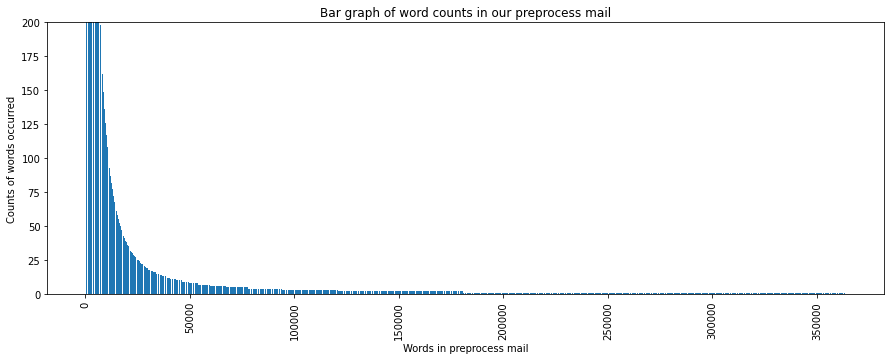

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(range(len(word)),word,align='center')
plt.xlabel('Words in preprocess mail')
plt.ylabel('Counts of words occurred')
plt.title('Bar graph of word counts in our preprocess mail')
plt.xticks(rotation=90)
plt.ylim(0,200)

In this bar graph, we plot the counts of words that occur in the whole corpus, vs words in a sentence, here we converted each word into a token, so we have a total of 350k words in our corpus.

Very few words occur more than 5 times, and we have removed all rare words in the corpus.

we remove all the words which not occur more than 150 times.

In [138]:
vocab = dict()
for i,j in dict(tokenizer.word_counts).items():
    if j>150:
        vocab[i]=j

In [139]:
len(vocab)

11116

In [140]:
indices = []
for i in tqdm(range(df_.shape[0])):
    for j in df_.iloc[i].split():
        if j not in vocab:
            break
    else:
        indices.append(i)

100%|██████████| 223825/223825 [00:04<00:00, 46504.17it/s]


In [141]:
len(indices)

38928

In [142]:
clean_df = df_.iloc[indices]

In [143]:
print(clean_df.sample(10))

58040                                                  jeff
57971                                    sue maraenron corp
356553    check out this website and input information w...
3498               what your view crude from here over next
51929     fyi theresa theresa within the nbp family who ...
61774     here first draft our comments for the november...
130163    need sets monitor arms and judy needs sets did...
162257    will school conference until and then into mee...
288633    attached are the files you requested from the ...
453674                                         thanks edith
Name: preprocess_mail, dtype: object


In [144]:
clean_df.shape

(38928,)

In [145]:
x = list(clean_df.apply(lambda x:len(x)))
len(x)

38928

In [146]:
final_data = pd.DataFrame()
final_data['mail'] = clean_df
final_data['len'] = x
final_data.head()

,mail,len
0,here our forecast,17
2,test successful way,19
3,randy can you send schedule the salary and lev...,132
4,let shoot for tuesday,21
5,greg how about either next tuesday thursday ph...,51


In [147]:
final_data.shape

(38928, 2)

In [150]:
import numpy as np
a = x
for i in range(0 , 105,5):
    p = np.percentile(a, i)
    #print(i,' percentile value is',p)
    print('{} Percentile value is {}'.format(i,p))

0 Percentile value is 0.0
5 Percentile value is 14.0
10 Percentile value is 22.0
15 Percentile value is 29.0
20 Percentile value is 37.0
25 Percentile value is 45.0
30 Percentile value is 54.0
35 Percentile value is 63.0
40 Percentile value is 73.0
45 Percentile value is 82.0
50 Percentile value is 93.0
55 Percentile value is 105.0
60 Percentile value is 119.0
65 Percentile value is 134.0
70 Percentile value is 153.0
75 Percentile value is 176.0
80 Percentile value is 205.0
85 Percentile value is 246.0
90 Percentile value is 303.0
95 Percentile value is 417.0
100 Percentile value is 3319.0


In [157]:
for i in range(90 , 101,1):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

90  percentile value is 303.0
91  percentile value is 319.0
92  percentile value is 337.0
93  percentile value is 358.0
94  percentile value is 384.0
95  percentile value is 417.0
96  percentile value is 459.0
97  percentile value is 513.0
98  percentile value is 585.4599999999991
99  percentile value is 739.7300000000032
100  percentile value is 3319.0


As the final corpus, we take only those sentences with a length less than 448.

In [151]:
#removing further data points based on the 5th and 95th percentile values
data_final = final_data[(final_data.len > 0.0) & (final_data.len< 448.0)]

In [152]:
data_final.shape

(37287, 2)

In [155]:
data_final.mail.values[0]

'here our forecast'

100%|██████████| 37287/37287 [00:00<00:00, 114016.25it/s]


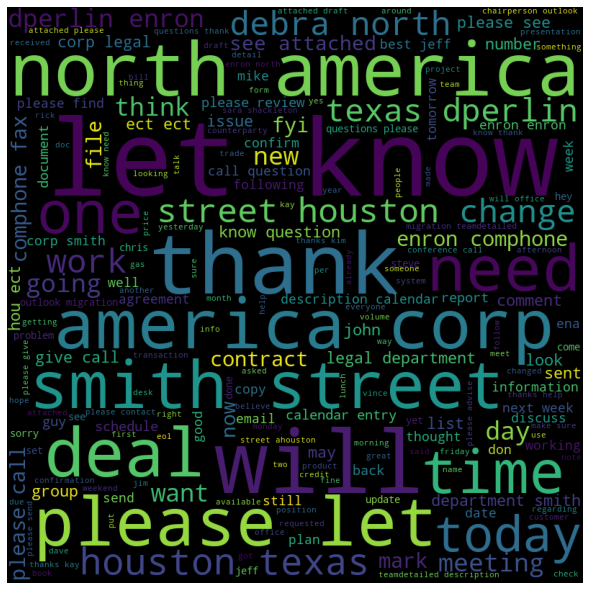

In [156]:
#code taken from https://www.geeksforgeeks.org/generating-word-cloud-python/
comment_words = ''
stopwords = set(STOPWORDS)
for val in tqdm(data_final.mail):
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='black',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 7. Data Preparation

In [ ]:
data_final

,mail,len
0,here our forecast,17
2,test successful way,19
3,randy can you send schedule the salary and lev...,132
4,let shoot for tuesday,21
5,greg how about either next tuesday thursday ph...,51
...,...,...
512200,you can increase the direct sale include dec t...,68
512212,john please check with louise how get the atta...,54
512218,not yet rob has been the court house all day e...,64
512222,some position with the alberta term book will ...,101


## 7.1**Split the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_final.mail, test_size=0.30, random_state=42)

In [ ]:
print('the shape of train data is' , train.shape)
print('the shape of test data is' , test.shape)

the shape of train data is (26100,)
the shape of test data is (11187,)


In [ ]:
x = []
y = []
for i in tqdm(train):
  a = i.split()
  for j in range(1,len(a)):
        x.append(' '.join(a[:j]))
        y.append(' '.join(a[j:]))

100%|██████████| 26100/26100 [00:01<00:00, 14789.19it/s]


In [ ]:
train_set = pd.DataFrame(data={'x_train':x,'y_train':y})
train_set['x_train'] = '<start> ' + train_set['x_train'] + ' <end>'
train_set['y_train'] = '<start> ' + train_set['y_train'] + ' <end>'
train_set.head()

,x_train,y_train
0,<start> don <end>,<start> know when are you leaving will try but...
1,<start> don know <end>,<start> when are you leaving will try but not ...
2,<start> don know when <end>,<start> are you leaving will try but not sure ...
3,<start> don know when are <end>,<start> you leaving will try but not sure how ...
4,<start> don know when are you <end>,<start> leaving will try but not sure how will...


In [ ]:
train_set.shape

(473015, 2)

In [ ]:
x_test = []
y_test = []
for i in tqdm(test):
  a = i.split()
  for j in range(1,len(a)):
        x_test.append(' '.join(a[:j]))
        y_test.append(' '.join(a[j:]))

100%|██████████| 11187/11187 [00:00<00:00, 19002.40it/s]


In [ ]:
    test_set = pd.DataFrame(data={'x_test':x_test,'y_test':y_test})
    test_set['x_test'] = '<start> ' + test_set['x_test'] + ' <end>'
    test_set['y_test'] = '<start> ' + test_set['y_test'] + ' <end>'
    test_set.head()

,x_test,y_test
0,<start> thank <end>,<start> you don need the value just need the s...
1,<start> thank you <end>,<start> don need the value just need the sitar...
2,<start> thank you don <end>,<start> need the value just need the sitara tr...
3,<start> thank you don need <end>,<start> the value just need the sitara transpo...
4,<start> thank you don need the <end>,<start> value just need the sitara transport r...


In [ ]:
test_set.shape

(204396, 2)

In [ ]:
train_set['x_train_len'] = train_set['x_train'].apply(lambda text:len(text.split()))

#here we remove all the rows from x_train / x_test where len is less then 5
train_set = train_set[train_set['x_train_len']>5]
train_set.shape

(398573, 3)

In [ ]:
train_set.sample(5)

,x_train,y_train,x_train_len
29479,<start> gcp adjustments highlighted red rgds s...,<start> enron enron ken curry enron enron raja...,45
298091,<start> have already given andy input you have...,<start> before today <end>,13
387681,<start> looks like the curve was marked around...,<start> price hello quick question gas what ba...,20
404312,<start> please see attached ena gisb special p...,<start> smith street houston texas dperlin enr...,15
21931,<start> john says they will working the house ...,<start> for sure next week alarm that day not ...,10


In [ ]:
test_set['x_test_len'] = test_set['x_test'].apply(lambda text:len(text.split()))

#here we remove all the rows from x_train / x_test where len is less then 5
test_set = test_set[test_set['x_test_len']>5]
test_set.shape

(172563, 3)

In [ ]:
test_set.sample(3)

,x_test,y_test,x_test_len
18126,<start> received your email and have forwarded...,<start> back with you soon hear back here you ...,12
175691,<start> talk you soon love steve has been grea...,<start> before leave don forget order your ham...,22
89367,<start> gordon attached the deemed isda and fa...,<start> anything else marie <end>,26


#### For the next part??

#### As the next step, we can build a very simple model like MLP as our first-cut approach and then we move to advance models